# Part 1: Load MNIST data set and format it

In [ ]:
# Usaremos la base de datos MNIST
# Esta base de datos contiene imágenes binarias de dígitos escritos a mano.
# Usaremos las imágenes extendidas en forma de vector como datos 'x' y sus
# respectivas etiquetas (enteros) como valores de salida 'y'.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento como en los de validación y prueba.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [ ]:
# Load data set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes
x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


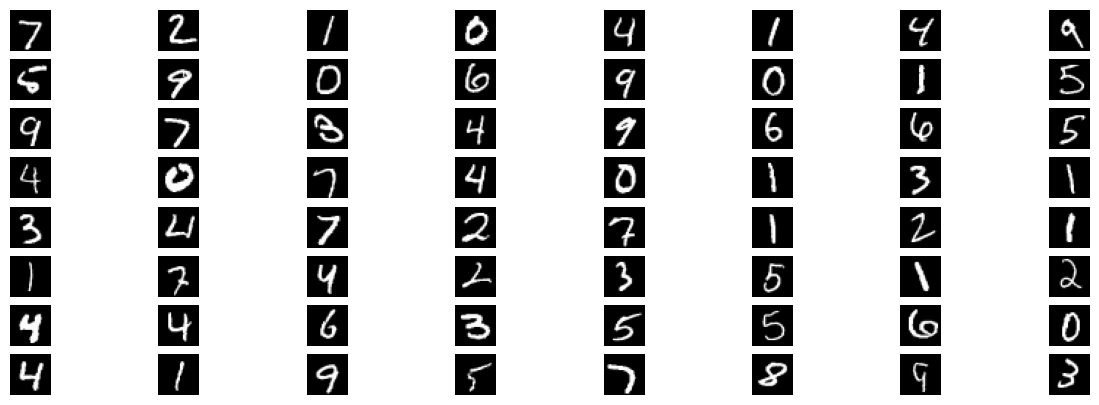

In [ ]:
# Visualize a few examples
plt.figure(figsize=(15, 5))
for ind in range(64):
    plt.subplot(8, 8, ind+1)
    plt.imshow(x_test[ind], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Put images into a vector format
x_train = np.reshape(x_train, (len(x_train), -1)).astype('float32') # tf requires float32 or float64
x_test  = np.reshape(x_test,  (len(x_test),  -1)).astype('float32')

print("X shapes")
print("x_train:", x_train.shape)
print("x_test :", x_test.shape)

X shapes
x_train: (60000, 784)
x_test : (10000, 784)


In [ ]:
# Put categorical data into one-hot encoding format
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Y shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Y shapes
y_train: (60000, 10)
y_test: (10000, 10)


# Part 2: Create DNN model and train it

In [ ]:
# tensorflow imports
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout
from keras.regularizers import l1, l2

In [ ]:

# La celda siguiente contiene dos modelos de redes neuronales. Comenta uno y usa otro.
# Evalua uno a la vez y reporta tus resultados.
#
# Nota que importamos layers tipo BatchNorm y Dropout, los cuales son usados en
# distintas secciones del modelo.
# También importamos regularizadores l1 y l2, los cuales son usados como parametros
# de las capas.
#
# Nota también el uso del parametro "metrics" en la compilación del modelo.
# Este parámetro es sólo informativo, pero no se usa para optimizar el modelo.
# En el caso particular de este modelo, se indica la exactitud de la clasificación,
# sin embargo la minimización del error se hace con la función de pérdida "categorical_crossentropy"
# Puedes revisar más detalles en la documentación de Keras o tf.
#
#
# Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?
# A1: El segundo modelo es preferible porque tiene un accuracy de 0.9 y una perdida de 0.3 mientras que
#     el primer modelo tiene un accuracy de 0.7 y una perdida de 0.85 esto indica que el segundo modelo.
#     Además, al comparar los mapas de calor en las matrices de confusión se puede observar claramente
#     que la clasificación con el segundo modelo, para la mayoria de clases tiene mejor resultados

# Q2: ¿Por qué usamos softmax en la salida de la red?
# A2: Se usa para generar probabilidades de clasificación para cada clase.

# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento"
#     menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas y sus tamaños.
# A3: Modificando el numero de capas y sus tamaños no fue posible obtener estas metricas, sin embargo,
#     como se puede ver en la red del primer modelo modificando la funcion de activacion y el optmizador
#     se consigue lo esperado

# Q4: Ahora usa  esos mismos valores de hiperparámetros(número de capas y sus tamaños)
#     en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2
#     para disminuir el error de generalización (validación).
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# A4: Con un Dropout de 0.33 y regularizacion l=3e-15 se consigue un error de generalizacion: 0.41 y exactitud: 87%
#     Además, se observa que la taza de dropout alto el crecimiento de la exactitud era mas lento lo cual tiene sentido ya que no
#     se estan entrenando todas las neuronas sino un 65%, por otro lado con Dropuot de 0.06 se obtiene error de generalizacion: 0.35
#     y una exactitud de: 90%, de esta manera se observa que disminutendo la taza de dropout se disminuye el error y se aumenta la
#     exactitud
#
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y tamaños para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación.
#     Reporta tu mejor modelo.
# A5: Una capa de 12000 neuronas y dos mas de 12000 y 2000
#     Entrenamiento 89% de exactitud y 0.36 de error
#     validacion 92% de exactitud y 0.274 de error


In [ ]:
# Create a Deep Network
DNN = Sequential()

# -- Try 01 --
# DNN.add(InputLayer(input_shape=x_train.shape[1:]))
# DNN.add(Dense(4, activation='relu'))
# DNN.add(Dense(2, activation='relu'))
# DNN.add(Dense(1, activation='relu'))

# -- Try 01 V2  --
# DNN.add(InputLayer(input_shape=x_train.shape[1:]))
# n = 200
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(n, activation='relu'))
# DNN.add(Dense(8000, activation='tanh'))
# -- ------ --

# -- Try 02 V2 --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dropout(rate=0.06 ))

DNN.add(Dense(12000, activation='tanh', activity_regularizer=l1(l=3e-15)))
DNN.add(BatchNormalization())
DNN.add(Dense(12000, activation='tanh', activity_regularizer=l2(l=3e-15)))
DNN.add(Dense(2000, activation='tanh', activity_regularizer=l2(l=3e-15)))


# # -- Try 02 --
# DNN.add(InputLayer(input_shape=x_train.shape[1:]))
# DNN.add(Dropout(rate=0.33))
# DNN.add(Dense(4))
# DNN.add(BatchNormalization())
# DNN.add(Activation('relu'))
# DNN.add(Dense(4, activation='relu', activity_regularizer=l1(l=3e-15)))
# DNN.add(Dense(4, activation='relu', activity_regularizer=l2(l=3e-15)))
# # -- ------ --

DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 784)               0         
                                                                 
 dense_102 (Dense)           (None, 12000)             9420000   
                                                                 
 batch_normalization_7 (Batc  (None, 12000)            48000     
 hNormalization)                                                 
                                                                 
 dense_103 (Dense)           (None, 12000)             144012000 
                                                                 
 dense_104 (Dense)           (None, 2000)              24002000  
                                                                 
 dense_105 (Dense)           (None, 10)                20010     
                                                     

In [ ]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from keras.optimizers import SGD
import tensorflow as tf

# adadelta =  tf.keras.optimizers.Adadelta(
#     learning_rate=0.001,
#     rho=0.95,
#     epsilon=1e-07,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name="Adadelta"
# )

sgd = SGD(learning_rate=0.01, momentum=0.6, decay=0.97, nesterov=True)


DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [ ]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/50
844/844 [==============================] - 43s 50ms/step - loss: 0.4720 - accuracy: 0.8576 - val_loss: 0.3214 - val_accuracy: 0.9058
Epoch 2/50
844/844 [==============================] - 42s 50ms/step - loss: 0.4240 - accuracy: 0.8731 - val_loss: 0.3100 - val_accuracy: 0.9090
Epoch 3/50
844/844 [==============================] - 41s 49ms/step - loss: 0.4105 - accuracy: 0.8783 - val_loss: 0.3032 - val_accuracy: 0.9125
Epoch 4/50
844/844 [==============================] - 41s 48ms/step - loss: 0.4048 - accuracy: 0.8798 - val_loss: 0.2992 - val_accuracy: 0.9135
Epoch 5/50
844/844 [==============================] - 41s 48ms/step - loss: 0.3996 - accuracy: 0.8814 - val_loss: 0.2961 - val_accuracy: 0.9142
Epoch 6/50
844/844 [==============================] - 42s 50ms/step - loss: 0.3968 - accuracy: 0.8829 - val_loss: 0.2938 - val_accuracy: 0.9143
Epoch 7/50
844/844 [==============================] - 41s 48ms/step - loss: 0.3948 - accuracy: 0.8834 - val_loss: 0.2923 - val_accuracy:

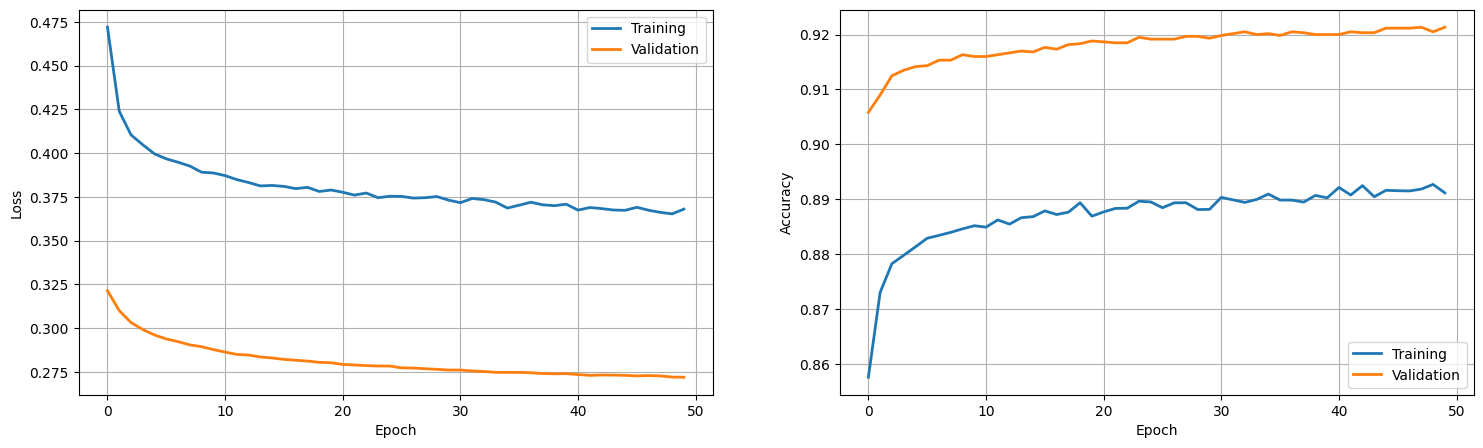

In [ ]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Compute test loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)

Test loss: 0.3105502724647522
Test acc: 0.907800018787384


In [ ]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

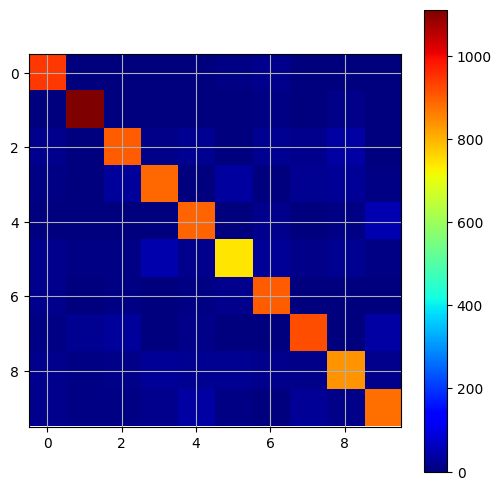

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

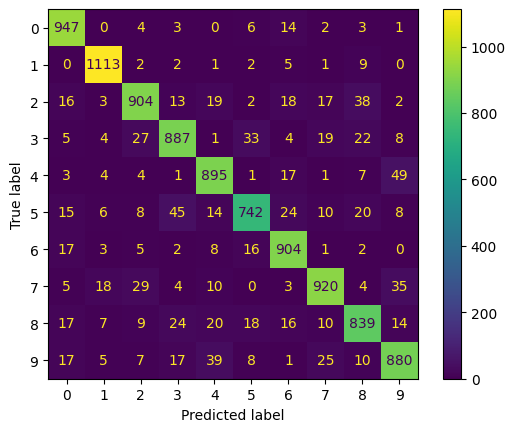

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_cat, y_test_hat_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Try 1

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 200)               157000    
                                                                 
 dense_76 (Dense)            (None, 200)               40200     
                                                                 
 dense_77 (Dense)            (None, 200)               40200     
                                                                 
 dense_78 (Dense)            (None, 200)               40200     
                                                                 
 dense_79 (Dense)            (None, 200)               40200     
                                                                 
 dense_80 (Dense)            (None, 200)               40200     
                                                                 
 dense_81 (Dense)            (None, 200)             

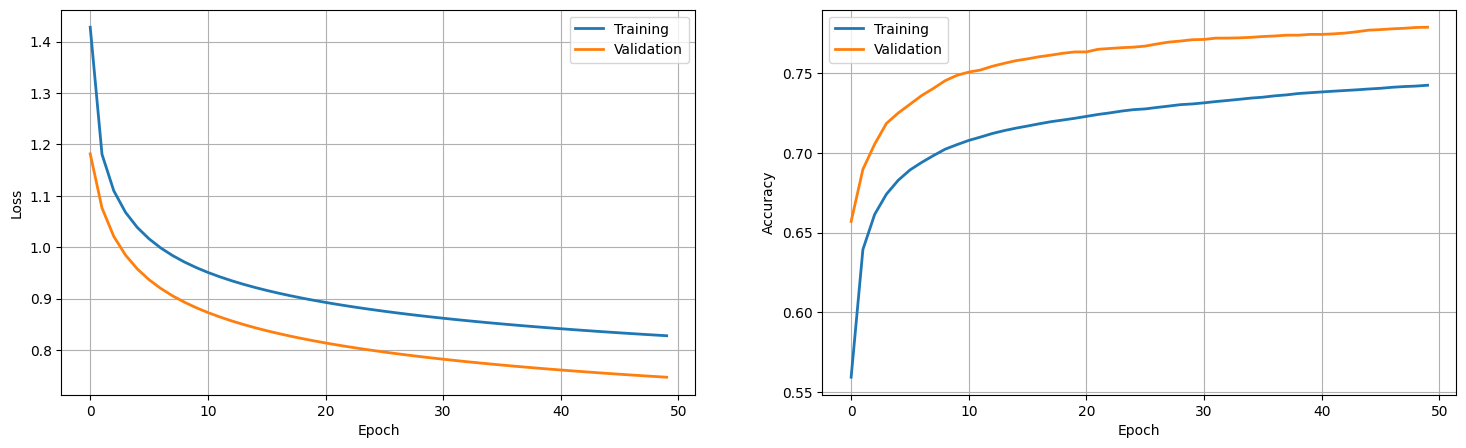

In [ ]:
# Create a Deep Network
DNN = Sequential()
#-- Try 01 V2  --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
n = 200
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(n, activation='relu'))
DNN.add(Dense(8000, activation='tanh'))
#-- ------ --


DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from keras.optimizers import SGD
import tensorflow as tf

# adadelta =  tf.keras.optimizers.Adadelta(
#     learning_rate=0.001,
#     rho=0.95,
#     epsilon=1e-07,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name="Adadelta"
# )

sgd = SGD(learning_rate=0.01, momentum=0.6, decay=0.97, nesterov=True)


DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Compute test loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)

Test loss: 0.8024709224700928
Test acc: 0.7501000165939331


313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


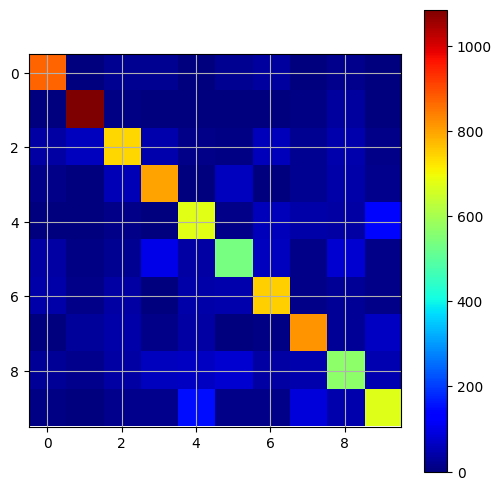

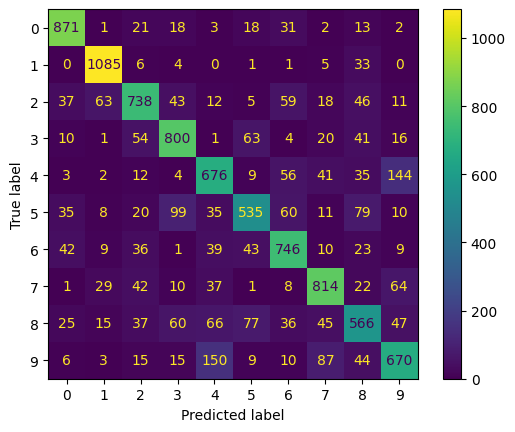

In [ ]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_cat, y_test_hat_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()